In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from scipy import stats
%matplotlib inline

warnings.filterwarnings('ignore')

In [2]:
# Load Data
df = pd.read_csv('nyc-rolling-sales.csv')
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [3]:
# Size of the data
df.shape

(84548, 22)

In [4]:
# Check Data type and convert it to proper data type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [5]:
# Convert some of the column to an appropriate data type.
df['BOROUGH'] = df['BOROUGH'].astype('category')
df['TAX CLASS AT PRESENT'] = df['TAX CLASS AT PRESENT'].astype('category')
df['TAX CLASS AT TIME OF SALE'] = df['TAX CLASS AT TIME OF SALE'].astype('category')

df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors ='coerce')
df['GROSS SQUARE FEET'] = pd.to_numeric(df['GROSS SQUARE FEET'],errors = 'coerce')

df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'],errors = 'coerce')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Unnamed: 0                      84548 non-null  int64   
 1   BOROUGH                         84548 non-null  category
 2   NEIGHBORHOOD                    84548 non-null  object  
 3   BUILDING CLASS CATEGORY         84548 non-null  object  
 4   TAX CLASS AT PRESENT            84548 non-null  category
 5   BLOCK                           84548 non-null  int64   
 6   LOT                             84548 non-null  int64   
 7   EASE-MENT                       84548 non-null  object  
 8   BUILDING CLASS AT PRESENT       84548 non-null  object  
 9   ADDRESS                         84548 non-null  object  
 10  APARTMENT NUMBER                84548 non-null  object  
 11  ZIP CODE                        84548 non-null  int64   
 12  RESIDENTIAL UNITS 

In [7]:
# Drop Column that will not use in this project.
# 'Unnamed: 0','EASE-MENT', 'SALE DATE'
col = ['Unnamed: 0','EASE-MENT', 'SALE DATE']
df.drop(col,inplace = True, axis = 1)

In [8]:
# Capture the necessary data
variables = df.columns

count = []

for variable in variables:
    length = df[variable].count()
    count.append(length)
    
count_pct = np.round(100 * pd.Series(count)/ len(df),2)

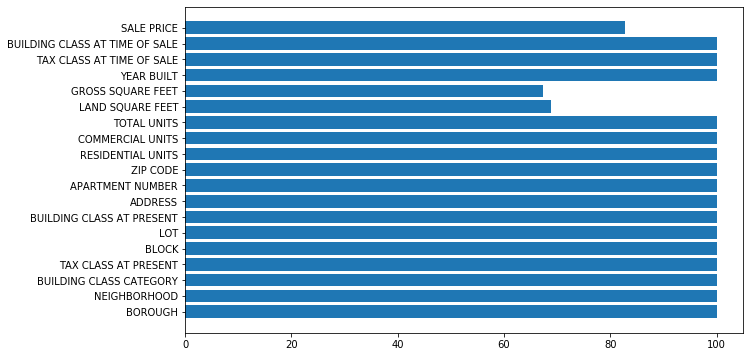

In [9]:
# Plot number of available data per variable
plt.figure(figsize = (10,6))
plt.barh(variables,count_pct)
plt.show()

In [10]:
# Check missing Value

for i in df.columns[df.isnull().any()]:
    print('Columns that has missing value:',i)

Columns that has missing value: LAND SQUARE FEET
Columns that has missing value: GROSS SQUARE FEET
Columns that has missing value: SALE PRICE


In [11]:
# Number of Missing Value
for i in df.isnull().sum():
    if i > 0:
        print(i)

26252
27612
14561


In [12]:
# Crete Data frame for missing value.
missing = df.isnull().sum()*100/len(df)
missing = missing[missing>0]
missing.sort_values(inplace = True)
missing = missing.to_frame()
missing.columns = ['count %']
missing.index.names = ['Name']
missing['Name'] = missing.index
missing

,count %,Name
Name,,
SALE PRICE,17.222170,SALE PRICE
LAND SQUARE FEET,31.049818,LAND SQUARE FEET
GROSS SQUARE FEET,32.658372,GROSS SQUARE FEET


Note :  Around 17 percents of all Sale Price are nul, which is the what I want to predict (label or target variable). This missing value is quite high, so I will remove it regard to the accuracy.


In [13]:
# Remove Observations with missing SALE PRICE
df = df[df['SALE PRICE'].notnull()]
print('Number of Observation after remove missing value from target variable:',len(df))

Number of Observation after remove missing value from target variable: 69987


In [14]:
# Summary of each numberical Data.
df.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,69987.000000,69987.000000,69987.000000,69987.000000,69987.000000,69987.000000,4.879900e+04,4.824800e+04,69987.000000,6.998700e+04
mean,4196.072528,373.828397,10741.455185,1.899553,0.172489,2.092203,3.629395e+03,3.672552e+03,1799.348236,1.276456e+06
std,3429.196524,656.096528,1263.234938,14.549545,9.123717,17.276100,4.035784e+04,2.947540e+04,520.884552,1.140526e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,1348.000000,22.000000,10306.000000,0.000000,0.000000,0.000000,1.438000e+03,8.280000e+02,1920.000000,2.250000e+05
50%,3378.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,2.150000e+03,1.620000e+03,1937.000000,5.300000e+05
75%,6186.000000,709.000000,11249.000000,2.000000,0.000000,2.000000,3.100000e+03,2.520000e+03,1965.000000,9.500000e+05
max,16319.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,2.210000e+09


In [15]:
# Suppress Scientific notation for descriptive statistic
df['SALE PRICE'].describe().apply(lambda x: format(x, 'f'))

count         69987.000000
mean        1276456.497764
std        11405255.345990
min               0.000000
25%          225000.000000
50%          530000.000000
75%          950000.000000
max      2210000000.000000
Name: SALE PRICE, dtype: object

#### Data Inspection
     1. Value in ZIP CODE is 0 which is wrong
     2. 75% of the property has to Commercial Units
     3. There are some property that has 0 square feet which is wrong or not for sale.
     4. There are some property build in year 0 which is wrong
     5. Some property has sale price at 0 which is wrong or in a transfer process not for sale.

#### Data Inspection

 2.1 Sale Price

Start inspected the target variable first.

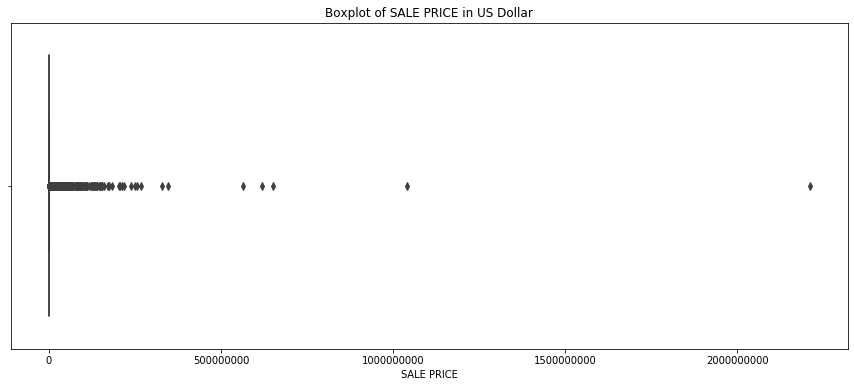

In [16]:
# Set the size of the figure
plt.figure(figsize = (15,6))

# Plot the data and configure the setting

sns.boxplot(x = 'SALE PRICE', data = df)
plt.ticklabel_format(style = 'plain', axis = 'x')
plt.title('Boxplot of SALE PRICE in US Dollar')
plt.show()

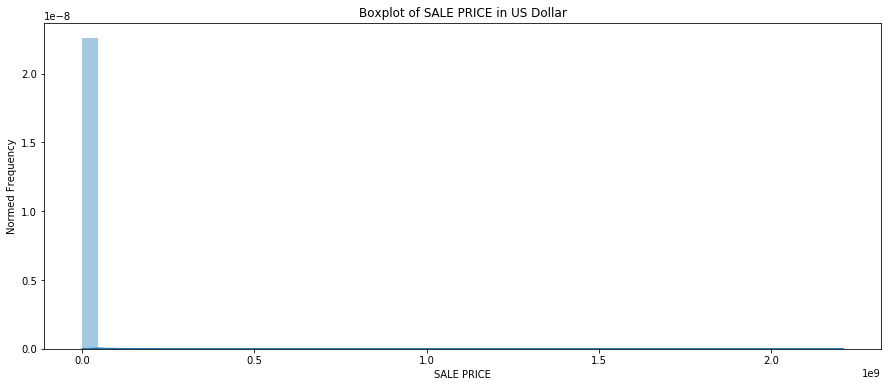

In [17]:
# Set the size of the figure
plt.figure(figsize = (15,6))

# Plot the data and configure the setting

sns.distplot(df['SALE PRICE'])
plt.title('Boxplot of SALE PRICE in US Dollar')
plt.ylabel('Normed Frequency')
plt.show()

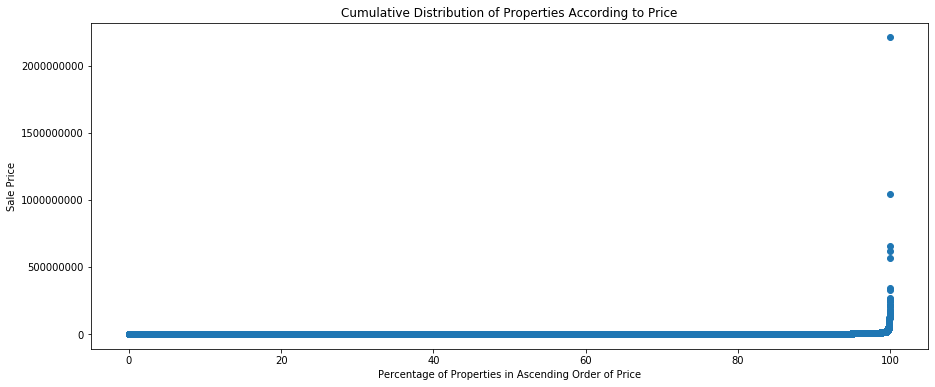

In [18]:
# Set the size of the plot
plt.figure(figsize = (15,6))

# Get the Data and Format it
x = df[['SALE PRICE']].sort_values(by = 'SALE PRICE').reset_index()
x['PROPERTY PROPORTION'] = 1
x['PROPERTY PROPORTION'] = x['PROPERTY PROPORTION'].cumsum()
x['PROPERTY PROPORTION'] = 100*x['PROPERTY PROPORTION']/len(x['PROPERTY PROPORTION'])

# Plot the data and configure the settings

plt.plot(x['PROPERTY PROPORTION'],x['SALE PRICE'],linestyle = 'None', marker = 'o')
plt.title('Cumulative Distribution of Properties According to Price')
plt.xlabel('Percentage of Properties in Ascending Order of Price')
plt.ylabel('Sale Price')
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.show()

From 2 graph above, we can see that there a lot of outlier. From the descriptive statistic, 75% of price is less than 950k. Moreover, there is also some properties that has lower price than 100k.

Credit to: AGK from Kaggle

Some iteration had been done to find the good range of sale price.

100k to 5M

In [19]:
# Remove Observation that fall outside those caps
df = df[(df['SALE PRICE'] >= 100000) & (df['SALE PRICE'] <= 5000000)]
print('Number of Observation after remove outliers from target variable:',len(df))

Number of Observation after remove outliers from target variable: 54801


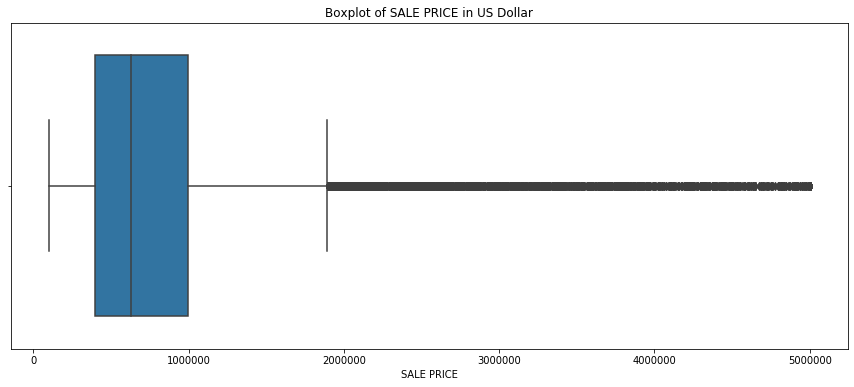

In [20]:
# Check the recent dataset with plot
# Set the size of the figure
plt.figure(figsize = (15,6))

# Plot the data and configure the setting

sns.boxplot(x = 'SALE PRICE', data = df)
plt.ticklabel_format(style = 'plain', axis = 'x')
plt.title('Boxplot of SALE PRICE in US Dollar')
plt.show()

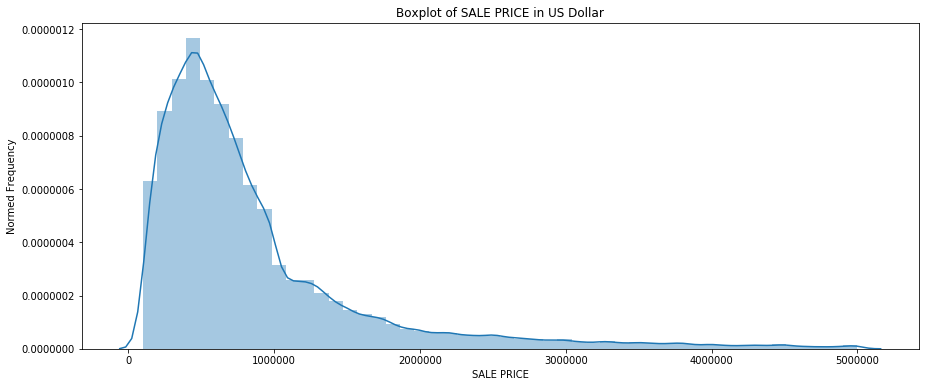

In [21]:
# Set the size of the figure
plt.figure(figsize = (15,6))

# Plot the data and configure the setting

sns.distplot(df['SALE PRICE'])
plt.title('Boxplot of SALE PRICE in US Dollar')
plt.ylabel('Normed Frequency')
plt.show()

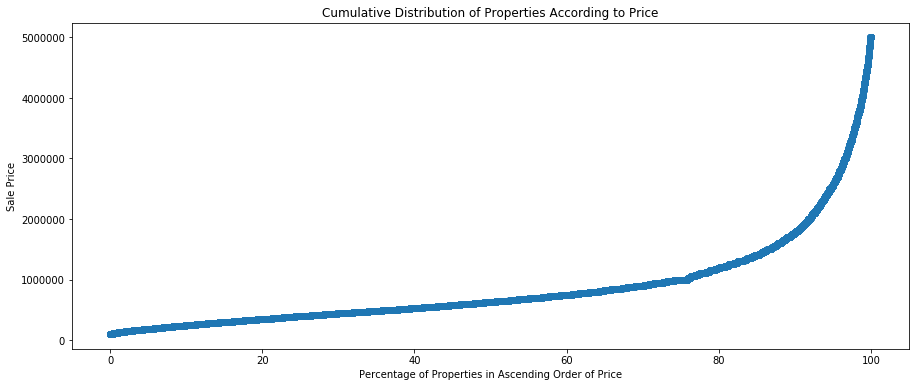

In [22]:
# Set the size of the plot
plt.figure(figsize = (15,6))

# Get the Data and Format it
x = df[['SALE PRICE']].sort_values(by = 'SALE PRICE').reset_index()
x['PROPERTY PROPORTION'] = 1
x['PROPERTY PROPORTION'] = x['PROPERTY PROPORTION'].cumsum()
x['PROPERTY PROPORTION'] = 100*x['PROPERTY PROPORTION']/len(x['PROPERTY PROPORTION'])

# Plot the data and configure the settings

plt.plot(x['PROPERTY PROPORTION'],x['SALE PRICE'],linestyle = 'None', marker = 'o')
plt.title('Cumulative Distribution of Properties According to Price')
plt.xlabel('Percentage of Properties in Ascending Order of Price')
plt.ylabel('Sale Price')
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.show()

#### Revisit Entire Dataset

In [23]:
# Capture the necessary data
variables = df.columns

count = []

for variable in variables:
    length = df[variable].count()
    count.append(length)
    
count_pct = np.round(100 * pd.Series(count)/ len(df),2)

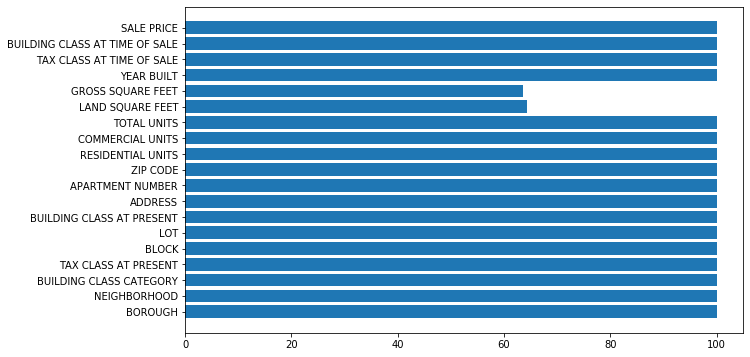

In [24]:
# Plot number of available data per variable
plt.figure(figsize = (10,6))
plt.barh(variables,count_pct)
plt.show()

 2.2 SQUARE FEET (GROSS and LAND)
 
     In these variable, I will impute method for the missing value with mean value.

In [25]:
#Filling missing value with mean value of it columns

df['LAND SQUARE FEET'] = df['LAND SQUARE FEET'].fillna(df['LAND SQUARE FEET'].mean())
df['GROSS SQUARE FEET'] = df['GROSS SQUARE FEET'].fillna(df['GROSS SQUARE FEET'].mean())

In [26]:
# Keep Properties with fewer than 20,000 square feet
df = df[df['LAND SQUARE FEET'] < 20000]
df = df[df['GROSS SQUARE FEET']< 20000]

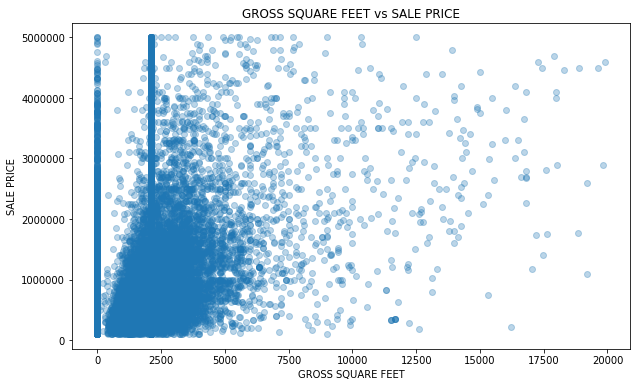

In [27]:
plt.figure(figsize = (10,6))
sns.regplot(x = 'GROSS SQUARE FEET', y = 'SALE PRICE',data = df, fit_reg = False ,scatter_kws = {'alpha':0.3})
plt.title('GROSS SQUARE FEET vs SALE PRICE')
plt.show()

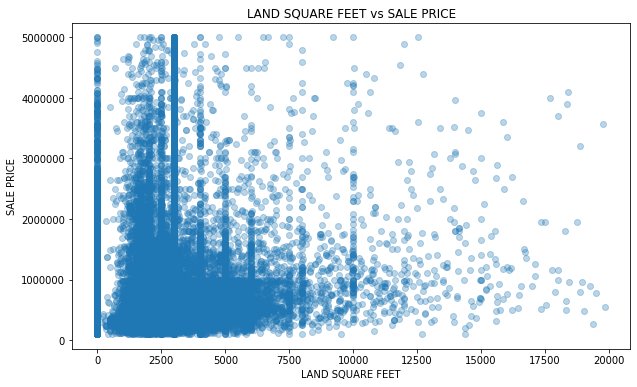

In [28]:
plt.figure(figsize = (10,6))
sns.regplot(x = 'LAND SQUARE FEET', y = 'SALE PRICE',data = df, fit_reg = False ,scatter_kws = {'alpha':0.3})
plt.title('LAND SQUARE FEET vs SALE PRICE')
plt.show()

2.3 Total Units
    
    First, remove outlier with the properties that has a lot of unit(ex.3000 units) and with 0 unit. Moreover, I will get rid of the sum of  Comercial Unit and Residential Units that doesn't match Total units

In [29]:
# The range of number of unit will be between 1 to 50.
# This will include, residential and comercial property type.
df = df[(df['TOTAL UNITS'] > 0) & (df['TOTAL UNITS'] <=50)]

In [30]:
# Remove the data where comercial and residential type doesn't add up to the total units.

df = df[df['TOTAL UNITS'] == df['COMMERCIAL UNITS'] + df['RESIDENTIAL UNITS']]

In [31]:
# Recent Data Size
df.shape

(38589, 19)

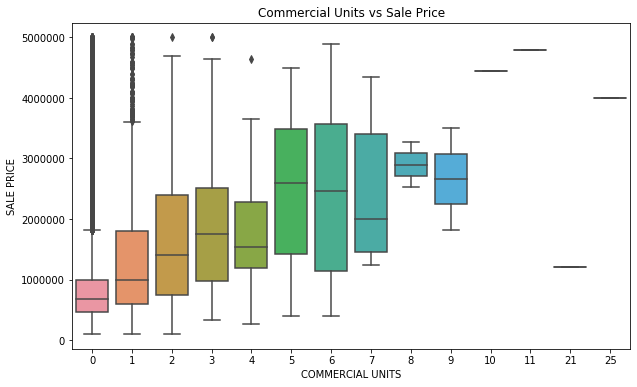

In [32]:
plt.figure(figsize = (10,6))
sns.boxplot(x = 'COMMERCIAL UNITS',y = 'SALE PRICE', data = df)
plt.title('Commercial Units vs Sale Price')
plt.show()

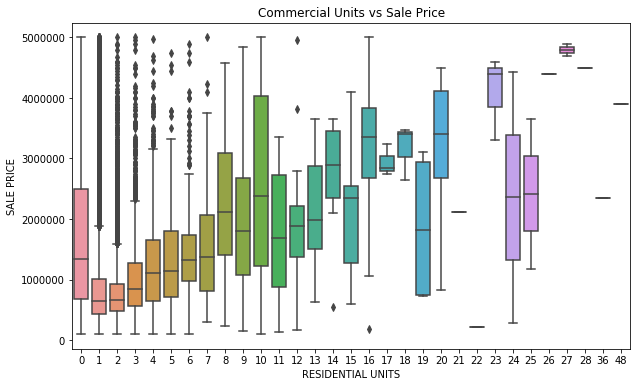

In [33]:
plt.figure(figsize = (10,6))
sns.boxplot(x = 'RESIDENTIAL UNITS',y = 'SALE PRICE', data = df)
plt.title('Commercial Units vs Sale Price')
plt.show()

 2.4 Year Built
    For the YEAR BUILT variable, There are some building that were in the year of 0 which can't be correct. And some buildings were built before 1800 which it will be remove from our analysis.

In [34]:
df = df[df['YEAR BUILT'] > 1800 ]

    However, Year built its does't quite related to what we are trying to predict. But, the age of the building is more interesting 
    So, the year built in each building will be duducted by 2017 since this data was collected for 12 month period in 2017 to get the age of building.

In [35]:
df['BUILDING AGE'] = 2017 - df['YEAR BUILT']

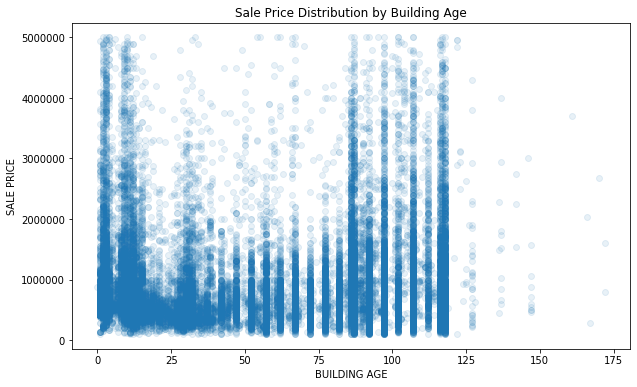

In [36]:
plt.figure(figsize = (10,6))
sns.regplot(x = 'BUILDING AGE', y= 'SALE PRICE', data = df, fit_reg = False, scatter_kws = {'alpha':0.1})
plt.title('Sale Price Distribution by Building Age')
plt.show()

In [37]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,BUILDING AGE
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.00000,6794.00000,1913,2,C4,3936272.0,104
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,,10009,8,0,8,1750.00000,4226.00000,1920,2,C4,3192840.0,97
79,1,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1003,R4,324 EAST 4TH STREET,3A,10009,1,0,1,2974.69011,2119.65046,1920,2,R4,762669.0,97
80,1,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1004,R4,324 EAST 4TH STREET,3B,10009,1,0,1,2974.69011,2119.65046,1920,2,R4,772851.0,97
81,1,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1005,R4,324 EAST 4TH STREET,4A,10009,1,0,1,2974.69011,2119.65046,1920,2,R4,1034880.0,97


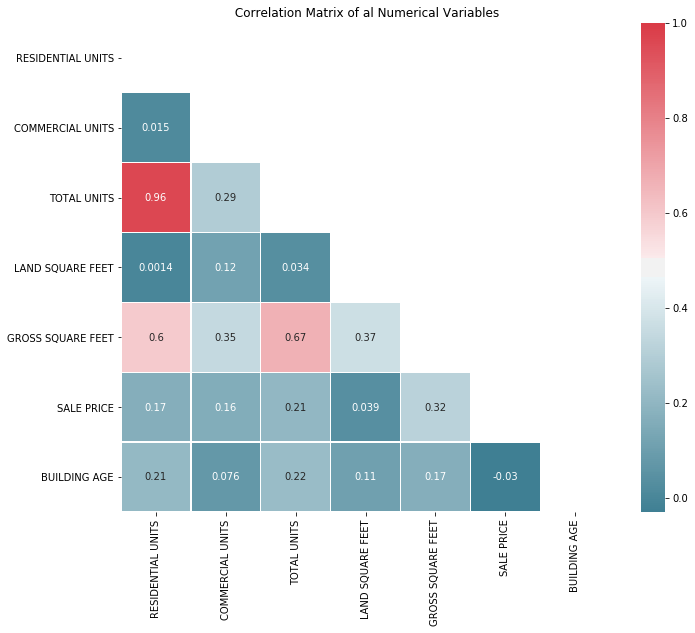

In [38]:
# Correlation Matrix

# Complete Correlation Matrix with interested features only.

col = df[['RESIDENTIAL UNITS','COMMERCIAL UNITS','TOTAL UNITS', 'LAND SQUARE FEET',
       'GROSS SQUARE FEET','SALE PRICE', 'BUILDING AGE']]

corr = col.corr()
# Generate a msk for the upper triangle

mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure

f,ax  = plt.subplots(figsize = (11,9))

# Generate a custom diverging colormap

cmap = sns.diverging_palette(220,10, as_cmap =True)

# Draw the heatmap  with the mask and correct aspect ratio

sns.heatmap(corr, mask = mask, 
           square = True, linewidths = 0.5, annot= True, cmap = cmap)

plt.yticks(rotation = 0)
plt.title(' Correlation Matrix of al Numerical Variables')
plt.show()

#### Create a Test Set

In [39]:
# Method 1 -- function to split data randomly using random method from python
def split_train_test(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [40]:
train_set , test_set = split_train_test(df,0.2)

In [41]:
print(len(train_set),len(test_set))

28957 7239


In [42]:
#Method 2 -- Use hash function to for keeping data unique
from zlib import crc32
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio *2**32

def split_train_test_by_id(data,test_ratio,id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [43]:
df_with_id = df.reset_index()
train_set, test_set = split_train_test_by_id(df_with_id,0.2,'index')

In [44]:
# Method 3 -- Sci-kit learn
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 32)

In [45]:
# Reference information to do stratified sampling 
corr_matrix = df.corr()
corr_matrix['SALE PRICE'].sort_values(ascending = False)

SALE PRICE           1.000000
GROSS SQUARE FEET    0.316660
LOT                  0.220669
TOTAL UNITS          0.206769
RESIDENTIAL UNITS    0.168881
COMMERCIAL UNITS     0.161651
LAND SQUARE FEET     0.038838
YEAR BUILT           0.030483
BUILDING AGE        -0.030483
ZIP CODE            -0.152310
BLOCK               -0.353234
Name: SALE PRICE, dtype: float64

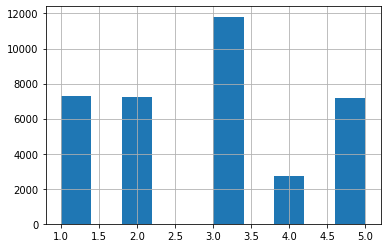

In [46]:
#From the correlation matrix, 'GROSS SQUARE FEET' feature has the highest correlation which we will use as a parameter
    #for straified sampling 
df['gross_square_feet_cat'] = pd.qcut(df['GROSS SQUARE FEET'],q =5, precision = 0,labels = range(1,6))
df['gross_square_feet_cat'].hist()

In [47]:
# Method 4 Stratified Sampling Random
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits =1 , test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(df,df['gross_square_feet_cat']):
    strat_train_set = df.iloc[train_index]
    strat_test_set = df.iloc[test_index]

In [48]:
# Drop 'gross_square_feet_cat' column.

for set_ in (strat_train_set,strat_test_set):
    set_.drop('gross_square_feet_cat', axis = 1, inplace = True)

In [49]:
# From this point ,I will use tran/test data from stratified sampling.
strat_train_set.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,BUILDING AGE
29698,3,BOROUGH PARK,04 TAX CLASS 1 CONDOS,1A,5703,1902,R3,1144 58TH STREET,2,11219,1,0,1,0.0,0.0,2015,1,R3,661862.0,2
54148,4,DOUGLASTON,01 ONE FAMILY DWELLINGS,1,8211,31,A2,246-27 THORNHILL AVENUE,,11362,1,0,1,3880.0,1056.0,1950,1,A2,775000.0,67
28273,3,BENSONHURST,03 THREE FAMILY DWELLINGS,1,6304,31,C0,1466 82ND STREET,,11228,3,0,3,2500.0,2400.0,1935,1,C0,1210000.0,82
46044,3,SHEEPSHEAD BAY,02 TWO FAMILY DWELLINGS,1,7405,519,B9,2334 EAST 26TH STREET,,11229,2,0,2,2200.0,1890.0,1940,1,B9,860000.0,77
77697,5,ELTINGVILLE,01 ONE FAMILY DWELLINGS,1,5373,10,A2,38 OSAGE LANE,,10312,1,0,1,4000.0,1196.0,1955,1,A2,530000.0,62


#### Visualization

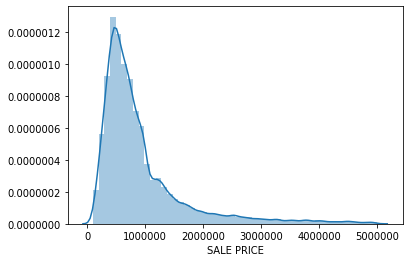

In [50]:
# Visualizing Target Variable
# SALE PRICE distribution
train_vis = strat_train_set.copy()
train_vis = train_vis[(train_vis['SALE PRICE'] > 100000) & (train_vis['SALE PRICE'] < 5000000)]
sns.distplot(train_vis['SALE PRICE'])

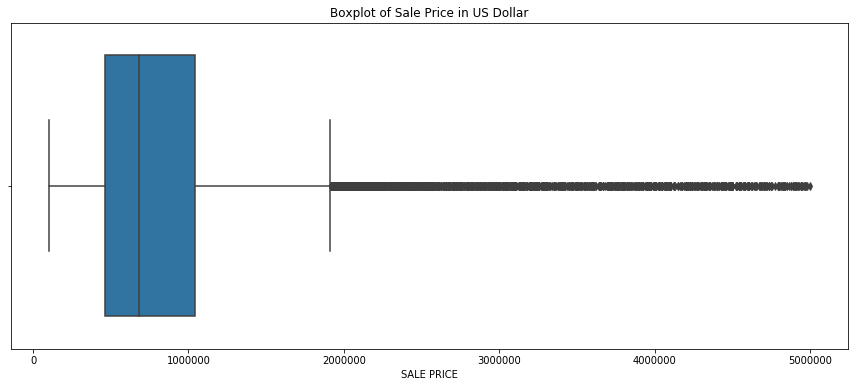

In [51]:
# SALE PRICE BOX plot
plt.figure(figsize = (15,6))

sns.boxplot(x = 'SALE PRICE', data = train_vis)
plt.ticklabel_format(style = 'plain', axis = 'x')
plt.title('Boxplot of Sale Price in US Dollar')
plt.show()

0.35897184674920035


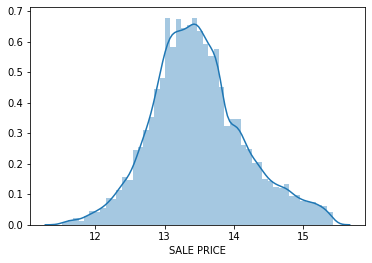

In [52]:
# Log function is applied to SALE PRICE column for normalization, and cheking the distribution with histrogram.
sales = np.log(train_vis['SALE PRICE'])
print(sales.skew())
sns.distplot(sales)

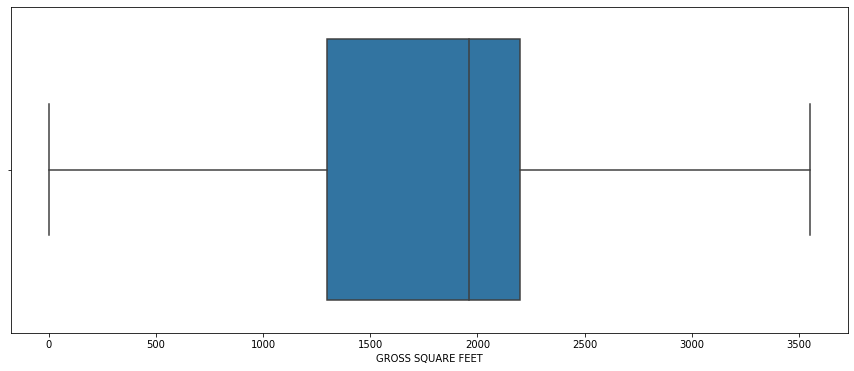

In [53]:
#Boxplot of GROSS SQUARE FEET feature.
plt.figure(figsize = (15,6))
sns.boxplot(x = 'GROSS SQUARE FEET', data = train_vis , showfliers = False)


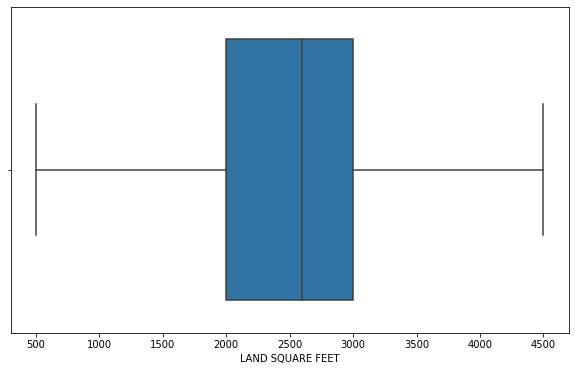

In [54]:
# Boxplot of LAND SQUARE FEET feature.
plt.figure(figsize = (10,6))
sns.boxplot(x = 'LAND SQUARE FEET', data = train_vis , showfliers = False)

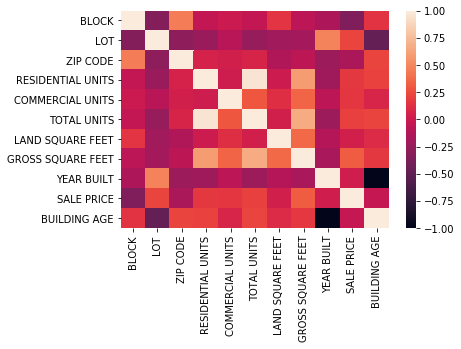

In [55]:
# Correlation Plot.
corr_matrix = df.corr()
sns.heatmap(corr_matrix)

In [56]:
corr_matrix

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,BUILDING AGE
BLOCK,1.000000,-0.333389,0.457818,-0.045934,-0.007352,-0.045963,0.154845,-0.075439,-0.146224,-0.353234,0.146224
LOT,-0.333389,1.000000,-0.286799,-0.229999,-0.090876,-0.245317,-0.198232,-0.186189,0.479898,0.220669,-0.479898
ZIP CODE,0.457818,-0.286799,1.000000,0.061569,0.033381,0.068210,-0.129667,-0.069822,-0.219593,-0.152310,0.219593
RESIDENTIAL UNITS,-0.045934,-0.229999,0.061569,1.000000,0.014637,0.959818,0.001410,0.596194,-0.213168,0.168881,0.213168
COMMERCIAL UNITS,-0.007352,-0.090876,0.033381,0.014637,1.000000,0.294643,0.117423,0.347534,-0.075796,0.161651,0.075796
TOTAL UNITS,-0.045963,-0.245317,0.068210,0.959818,0.294643,1.000000,0.034303,0.667326,-0.224999,0.206769,0.224999
LAND SQUARE FEET,0.154845,-0.198232,-0.129667,0.001410,0.117423,0.034303,1.000000,0.371925,-0.109314,0.038838,0.109314
GROSS SQUARE FEET,-0.075439,-0.186189,-0.069822,0.596194,0.347534,0.667326,0.371925,1.000000,-0.167271,0.316660,0.167271
YEAR BUILT,-0.146224,0.479898,-0.219593,-0.213168,-0.075796,-0.224999,-0.109314,-0.167271,1.000000,0.030483,-1.000000
SALE PRICE,-0.353234,0.220669,-0.152310,0.168881,0.161651,0.206769,0.038838,0.316660,0.030483,1.000000,-0.030483


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fecc2513510>,
      dtype=object)

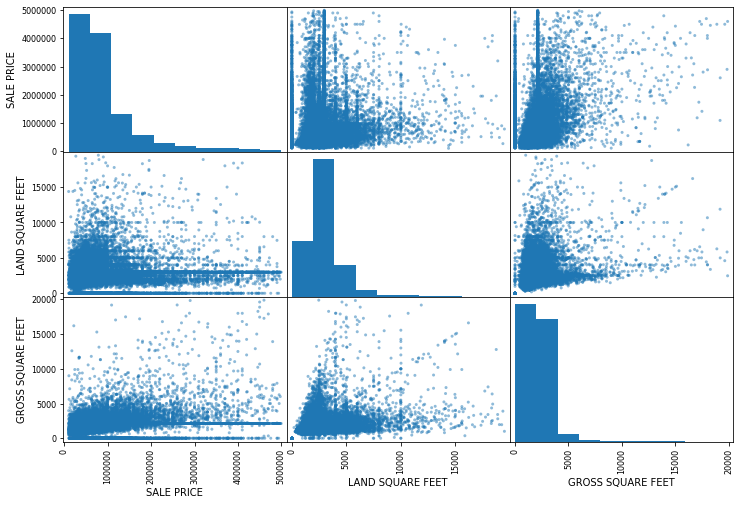

In [57]:
from pandas.plotting import scatter_matrix
attributes = ['SALE PRICE','LAND SQUARE FEET','GROSS SQUARE FEET']
scatter_matrix(train_vis[attributes],figsize=(12,8))

In [58]:
# Correlation of Target "SALE PRICE" in number
corr_matrix['SALE PRICE'].sort_values(ascending = False)

SALE PRICE           1.000000
GROSS SQUARE FEET    0.316660
LOT                  0.220669
TOTAL UNITS          0.206769
RESIDENTIAL UNITS    0.168881
COMMERCIAL UNITS     0.161651
LAND SQUARE FEET     0.038838
YEAR BUILT           0.030483
BUILDING AGE        -0.030483
ZIP CODE            -0.152310
BLOCK               -0.353234
Name: SALE PRICE, dtype: float64

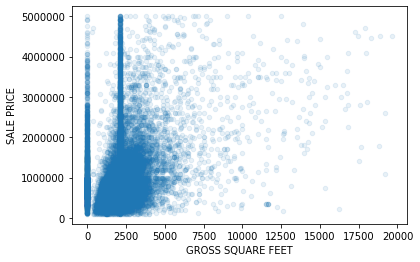

In [59]:
# Zoom in for GROSS SQUARE FEET since it has the highest correlation to SALE PRICE
train_set.plot(kind="scatter", x="GROSS SQUARE FEET", y="SALE PRICE", alpha=0.1)

#### Prepared Data For Machine Learning

In [60]:
housing = strat_train_set.drop('SALE PRICE', axis =1)
# Fill the missing value of the label column with its mean
housing_label = strat_train_set['SALE PRICE']

#### Data Cleaning

In [61]:
#LAND SQUARE FEET ,GROSS SQUARE FEET has been filled missing value with mean.
housing.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,BUILDING AGE
29698,3,BOROUGH PARK,04 TAX CLASS 1 CONDOS,1A,5703,1902,R3,1144 58TH STREET,2,11219,1,0,1,0.0,0.0,2015,1,R3,2
54148,4,DOUGLASTON,01 ONE FAMILY DWELLINGS,1,8211,31,A2,246-27 THORNHILL AVENUE,,11362,1,0,1,3880.0,1056.0,1950,1,A2,67
28273,3,BENSONHURST,03 THREE FAMILY DWELLINGS,1,6304,31,C0,1466 82ND STREET,,11228,3,0,3,2500.0,2400.0,1935,1,C0,82
46044,3,SHEEPSHEAD BAY,02 TWO FAMILY DWELLINGS,1,7405,519,B9,2334 EAST 26TH STREET,,11229,2,0,2,2200.0,1890.0,1940,1,B9,77
77697,5,ELTINGVILLE,01 ONE FAMILY DWELLINGS,1,5373,10,A2,38 OSAGE LANE,,10312,1,0,1,4000.0,1196.0,1955,1,A2,62


In [62]:
housing.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
BUILDING AGE                      0
dtype: int64

In [63]:
# Experiment with Attribute Combination

# sum 0 value cause infinity value in the combination
housing['space per units'] = housing['GROSS SQUARE FEET'] / housing['TOTAL UNITS']
housing['space per units']

29698       0.00000
54148    1056.00000
28273     800.00000
46044     945.00000
77697    1196.00000
            ...    
63229    1350.00000
52360    3300.00000
73027     756.00000
66387    2119.65046
31218     779.00000
Name: space per units, Length: 28956, dtype: float64

#### Data Cleaning

In [64]:
#• Get rid of the corresponding districts.
housing.dropna(subset = ['space per units'])

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,BUILDING AGE,space per units
29698,3,BOROUGH PARK,04 TAX CLASS 1 CONDOS,1A,5703,1902,R3,1144 58TH STREET,2,11219,1,0,1,0.00000,0.00000,2015,1,R3,2,0.00000
54148,4,DOUGLASTON,01 ONE FAMILY DWELLINGS,1,8211,31,A2,246-27 THORNHILL AVENUE,,11362,1,0,1,3880.00000,1056.00000,1950,1,A2,67,1056.00000
28273,3,BENSONHURST,03 THREE FAMILY DWELLINGS,1,6304,31,C0,1466 82ND STREET,,11228,3,0,3,2500.00000,2400.00000,1935,1,C0,82,800.00000
46044,3,SHEEPSHEAD BAY,02 TWO FAMILY DWELLINGS,1,7405,519,B9,2334 EAST 26TH STREET,,11229,2,0,2,2200.00000,1890.00000,1940,1,B9,77,945.00000
77697,5,ELTINGVILLE,01 ONE FAMILY DWELLINGS,1,5373,10,A2,38 OSAGE LANE,,10312,1,0,1,4000.00000,1196.00000,1955,1,A2,62,1196.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63229,4,HOWARD BEACH,02 TWO FAMILY DWELLINGS,1,14175,52,B3,159-21 95TH STREET,,11414,2,0,2,3000.00000,2700.00000,1940,1,B3,77,1350.00000
52360,4,BELLEROSE,01 ONE FAMILY DWELLINGS,1,8585,7,A3,82-33 252ND STREET,,11426,1,0,1,5000.00000,3300.00000,2009,1,A3,8,3300.00000
73027,4,SOUTH OZONE PARK,01 ONE FAMILY DWELLINGS,1,11754,21,A1,119-71 130TH STREET,,11420,1,0,1,2255.00000,756.00000,1920,1,A1,97,756.00000
66387,4,LONG ISLAND CITY,13 CONDOS - ELEVATOR APARTMENTS,2,62,1039,R4,11-02 49TH AVENUE,4G,11101,1,0,1,2974.69011,2119.65046,2007,2,R4,10,2119.65046


In [65]:
#• Get rid of the whole attribute.
housing.drop('space per units', axis = 1,inplace = True)

In [66]:
#• Set the values to some value (zero, the mean, the median, etc.)
# I already did this from the begining of the process.

#### Handling with text data

In [67]:
# Checking number of unique value for the text column
print('Number of Building Class Category',housing['BUILDING CLASS CATEGORY'].value_counts().shape,'\n'
     'Number of Neighborhood ',housing['NEIGHBORHOOD'].value_counts().shape,'\n'
     'Number of Tax Class at Present',housing['TAX CLASS AT PRESENT'].value_counts().shape,'\n'
     'Number of Building Class at Present',housing['BUILDING CLASS AT PRESENT'].value_counts().shape,'\n'
     'Number of Building Class at Time of Sale',housing['BUILDING CLASS AT TIME OF SALE'].value_counts().shape)

Number of Building Class Category (30,) 
Number of Neighborhood  (246,) 
Number of Tax Class at Present (11,) 
Number of Building Class at Present (93,) 
Number of Building Class at Time of Sale (93,)


In [68]:
# Drop Text Column, and some category variable
#
col = ['NEIGHBORHOOD',
       'BUILDING CLASS AT PRESENT',
       'BUILDING CLASS AT TIME OF SALE',
       'ADDRESS','APARTMENT NUMBER','ZIP CODE',"YEAR BUILT",
      'TAX CLASS AT PRESENT']
housing.drop(col,axis = 1 ,inplace = True)

In [69]:
housing.head()

,BOROUGH,BUILDING CLASS CATEGORY,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE,BUILDING AGE
29698,3,04 TAX CLASS 1 CONDOS,5703,1902,1,0,1,0.0,0.0,1,2
54148,4,01 ONE FAMILY DWELLINGS,8211,31,1,0,1,3880.0,1056.0,1,67
28273,3,03 THREE FAMILY DWELLINGS,6304,31,3,0,3,2500.0,2400.0,1,82
46044,3,02 TWO FAMILY DWELLINGS,7405,519,2,0,2,2200.0,1890.0,1,77
77697,5,01 ONE FAMILY DWELLINGS,5373,10,1,0,1,4000.0,1196.0,1,62


#### Data Transforming

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [71]:
housing_num = housing[['BLOCK', 'LOT',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'TAX CLASS AT TIME OF SALE',
       'BUILDING AGE']]
housing_num

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE,BUILDING AGE
29698,5703,1902,1,0,1,0.00000,0.00000,1,2
54148,8211,31,1,0,1,3880.00000,1056.00000,1,67
28273,6304,31,3,0,3,2500.00000,2400.00000,1,82
46044,7405,519,2,0,2,2200.00000,1890.00000,1,77
77697,5373,10,1,0,1,4000.00000,1196.00000,1,62
...,...,...,...,...,...,...,...,...,...
63229,14175,52,2,0,2,3000.00000,2700.00000,1,77
52360,8585,7,1,0,1,5000.00000,3300.00000,1,8
73027,11754,21,1,0,1,2255.00000,756.00000,1,97
66387,62,1039,1,0,1,2974.69011,2119.65046,2,10


In [72]:
# Transform data only for numerical
num_pipeline = Pipeline([('std_scaler',StandardScaler())])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [73]:
# Transform multiple column
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['BOROUGH']
pipeline = ColumnTransformer([('num',num_pipeline,num_attribs),
                              ('cat',OneHotEncoder(),cat_attribs)
                             ])
housing_prepared = pipeline.fit_transform(housing)

In [74]:
housing_prepared.shape

(28956, 14)

#### Select And Train A model on the Training Set

In [75]:
# Linear Regression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
some_data = housing
some_labels = housing_label
some_data_prepared = pipeline.fit_transform(some_data)

print('Prediction:', lin_reg.predict(some_data_prepared)[:5])
print('\n')
print('Labels:', list(some_labels)[:5])


Prediction: [ 664818.5  600730.5 1074394.5  902026.5  330842.5]


Labels: [661862.0, 775000.0, 1210000.0, 860000.0, 530000.0]


In [77]:
## Evaluation Method wit RMSE (Root Mean Square Error)

from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_label, housing_predictions) # MSE
lin_rmse = np.sqrt(lin_mse) # RMSE
print('RMSE: ',lin_rmse)
print('R square: ',lin_reg.score(housing_prepared,housing_label))

RMSE:  594397.3076191016
R square:  0.4063669289246623


In [90]:
# Train With Decision Tree Regressor (More Powerfull Model to find non-linear relation)

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_label)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_label, housing_predictions)
tree_rmse = np.sqrt(tree_mse)

print('RMSE: ',tree_rmse)
print('R square: ',tree_reg.score(housing_prepared,housing_label))

RMSE:  37415.25122809108
R square:  0.9976478676688715


#### Using Cross Validation

In [79]:
# Cross Validation with Decision Tree Regressor
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg,housing_prepared,housing_label, scoring = 'neg_mean_squared_error', cv = 10)

tree_rmse_scores = np.sqrt(-scores)

In [80]:
def display_scores(scores):
    print('Scores:',scores)
    print('Mean:' , scores.mean())
    print('Standard Deviation:', scores.std())

In [81]:
display_scores(tree_rmse_scores)

Scores: [583565.57120515 537643.60933545 564801.65949639 595622.51325265
 571426.18130065 572504.41285771 524866.27744682 562235.9767741
 573471.33779789 565486.71819799]
Mean: 565162.4257664809
Standard Deviation: 19541.070511719663


In [82]:
# Cross Validation with Linear Regression
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_label,
                             scoring = 'neg_mean_squared_error', cv = 10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [599956.74741348 625237.52980631 620718.5447053  608658.88975675
 577065.27002291 598391.28685351 552054.14791925 567677.5121956
 605957.4224436  589472.31480273]
Mean: 594518.9665919424
Standard Deviation: 22043.622116935338


In [93]:
# With Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_label)

# RMSE
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_label, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
print('RMSE: ',forest_rmse)
print('R square: ',forest_reg.score(housing_prepared,housing_label))

RMSE:  166297.93971590424
R square:  0.9535336929810055


In [85]:
# Cross Validation with Random Forest Regressor
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_label,
                               scoring = 'neg_mean_squared_error', cv = 10)

forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [447894.54675023 435746.20242953 443759.05526092 463727.45087933
 435697.86623767 453288.73059648 412816.46410263 422312.0908365
 441309.80222412 439091.46069876]
Mean: 439564.36700161814
Standard Deviation: 13802.499116166566


#### Evaluate System the Test Data Set with Random Forest 

In [86]:
final_model = forest_reg

X_test = strat_test_set.drop('SALE PRICE', axis = 1)
y_test = strat_test_set['SALE PRICE'].copy()

col = ['NEIGHBORHOOD',
       'BUILDING CLASS AT PRESENT',
       'BUILDING CLASS AT TIME OF SALE',
       'ADDRESS','APARTMENT NUMBER','ZIP CODE',"YEAR BUILT",
      'TAX CLASS AT PRESENT']
X_test.drop(col,axis = 1 ,inplace = True)

In [87]:
X_test_prepared = pipeline.transform(X_test)

final_predictions = forest_reg.predict(X_test_prepared)

final_mse = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

427748.4332028685

In [88]:
# Cross Validation with Random Forest Regressor
forest_scores = cross_val_score(forest_reg, X_test_prepared, y_test,
                               scoring = 'neg_mean_squared_error', cv = 10)

forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [461711.38429131 481148.26352689 488790.94926358 462920.98462692
 387579.99553797 503743.80136421 537934.63583267 437917.63479558
 438112.40060672 455540.45011773]
Mean: 465540.0499963566
Standard Deviation: 38986.25061387671


In [89]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1,
                        loc = squared_errors.mean(),
                        scale = stats.sem(squared_errors)))

array([408952.09771261, 445752.87547191])